### Assess the correlation of AhR activation signature with expression of key genes
Out of all the tryptophan to kynurenine metabolizing enzymes (IDO1, IDO2, TDO2, IL4I1), IDO1 exhibits the strongest positive correlation with AhR activation signature in GBM cell lines, with a ranking of 1.15% out of ~25,000 genes. IL4i1 exhibits a weaker correlation (rank 3.39%), followed by TDO2 (rank 11.53%) and IDO2 (22.39%).
Interestingly, KYNU which metabolizes kynurenine to 3-hydroxykynurenine also shows a strong positive correlation of nearly 0.7 (rank: 0.42%). 
None of these genes were in the original AhR signature gene set from Sadik et al. 2020. This indicates that the correlation is independent and circularity is not a major concern.

Note: These findings are correlative. While metabolism of tryptophan to kynurenine is known to activate AhR, it is also known that AhR can upregulate expression of IDO1. It is unclear which plays the dominant role. 

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
expr_df = pd.read_csv('C:/research/bulk_rnaseq_clean.csv', index_col=0)
gsva_results_df = pd.read_csv('C:/research/GSC_RNAseq_and_metabolomics_analysis/gsva_results.csv', index_col=0)

# Display the first few rows of each DataFrame to verify successful loading
print(expr_df.iloc[:5, :5])  
print(gsva_results_df.iloc[:5, :5])


                BT41_T    BT48_T    BT50_T    BT53_T    BT67_T
DDX11L1       1.712039  1.712039  1.682834  1.712039  1.682834
WASH7P        8.975101  7.849454  8.035795  8.181404  7.758735
LOC729737     7.258292  6.069857  8.348614  4.950745  6.056402
FAM138D       1.700741  1.700741  1.716977  1.700741  1.716977
LOC101928626  1.694298  1.694298  1.696543  1.694298  1.696543
                     BT41_T    BT48_T    BT50_T    BT53_T    BT67_T
DEV_gs             0.121199 -0.044395  0.107647  0.092142 -0.306755
IR_gs             -0.124622  0.068298  0.009035 -0.188824  0.385338
AhR_activation_gs -0.072989  0.145668  0.209514 -0.005065  0.251873


In [39]:
# Transpose the DataFrames to have samples as rows and genes/pathways as columns
expr_df_T = expr_df.transpose()
gsva_results_df_T = gsva_results_df.transpose()

# Subset for only the GBM lines (no tissue)
gbm_line_expr_df = expr_df_T.loc['BT41_L':'G958_L']
gbm_line_gsva_df = gsva_results_df_T.loc['BT41_L':'G958_L']

print(gbm_line_expr_df.iloc[:5, :5])
print(gbm_line_gsva_df.iloc[-5:, -5:])  

# Merge the two DataFrames on their indices (sample names)
gbm_line_expr_gsva_merged_df = gbm_line_expr_df.merge(gbm_line_gsva_df, left_index=True, right_index=True)
print(gbm_line_expr_gsva_merged_df.iloc[-5:, -5:])  


         DDX11L1    WASH7P  LOC729737   FAM138D  LOC101928626
BT41_L  1.719338  8.374704   4.139061  1.712674      1.723233
BT48_L  2.777221  8.050898   4.056114  1.712674      1.723233
BT50_L  1.697442  7.448546   2.483791  1.731367      2.832425
BT53_L  1.719338  7.829159   3.230338  1.712674      1.723233
BT67_L  1.697442  7.963597   2.156779  1.731367      1.751513
          DEV_gs     IR_gs  AhR_activation_gs
G933_L -0.531020  0.492556           0.155341
G945_L -0.495620  0.397583           0.224481
G946_L  0.364573 -0.467418          -0.160882
G957_L -0.458306  0.446145           0.139973
G958_L  0.263937 -0.401506          -0.244733
            DAZ3  CSPG4P1Y    DEV_gs     IR_gs  AhR_activation_gs
G933_L  1.681042  1.701806 -0.531020  0.492556           0.155341
G945_L  1.681042  1.701806 -0.495620  0.397583           0.224481
G946_L  1.681042  1.701806  0.364573 -0.467418          -0.160882
G957_L  1.681042  1.701806 -0.458306  0.446145           0.139973
G958_L  1.681042  1.70

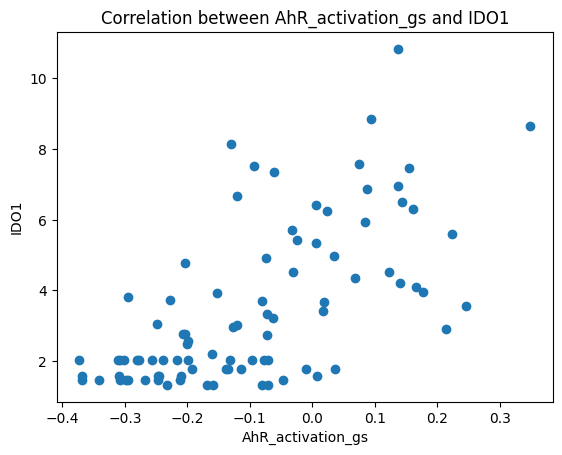

Pearson correlation: 0.643, p-value: 1.415e-11


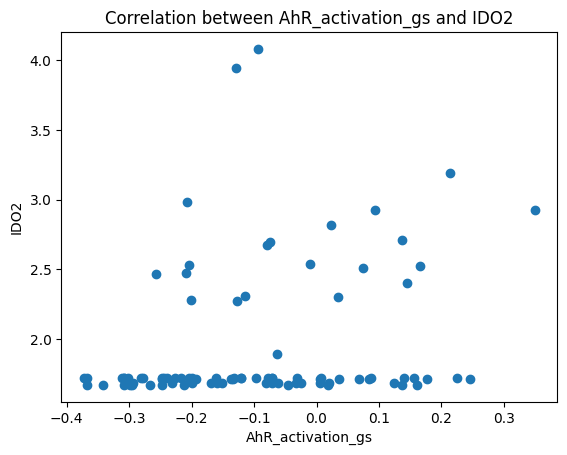

Pearson correlation: 0.239, p-value: 2.476e-02


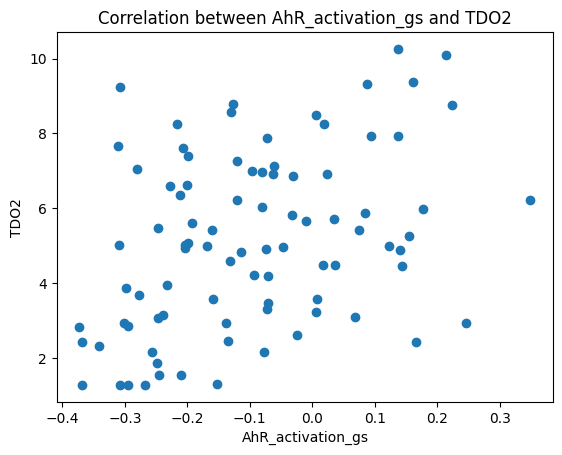

Pearson correlation: 0.380, p-value: 2.575e-04


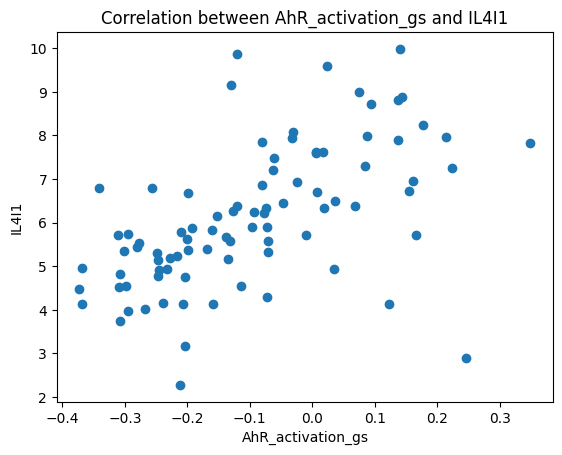

Pearson correlation: 0.554, p-value: 2.088e-08


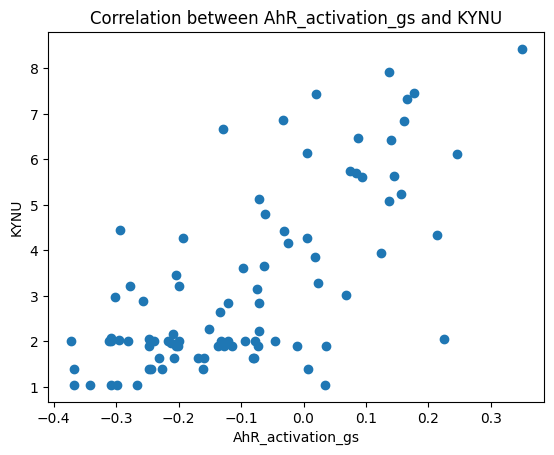

Pearson correlation: 0.696, p-value: 5.040e-14


In [60]:
def plot_gene_vs_ahr(gene_name, df):
    from scipy.stats import pearsonr
    import matplotlib.pyplot as plt

    plt.scatter(df['AhR_activation_gs'], df[gene_name])
    plt.xlabel('AhR_activation_gs')
    plt.ylabel(gene_name)
    plt.title(f'Correlation between AhR_activation_gs and {gene_name}')
    plt.show()

    corr, pval = pearsonr(df['AhR_activation_gs'], df[gene_name])
    print(f'Pearson correlation: {corr:.3f}, p-value: {pval:.3e}')


plot_gene_vs_ahr('IDO1', gbm_line_expr_gsva_merged_df)
plot_gene_vs_ahr('IDO2', gbm_line_expr_gsva_merged_df)
plot_gene_vs_ahr('TDO2', gbm_line_expr_gsva_merged_df)
plot_gene_vs_ahr('IL4I1', gbm_line_expr_gsva_merged_df)
plot_gene_vs_ahr('KYNU', gbm_line_expr_gsva_merged_df)

In [45]:
gene_corrs = gbm_line_expr_df.corrwith(gbm_line_gsva_df['AhR_activation_gs'])
print(gene_corrs.tail())

RBMY2EP         0.149108
TTTY13         -0.265531
LOC101929148   -0.239800
DAZ3           -0.085273
CSPG4P1Y       -0.194101
dtype: float64


In [ ]:
# Fetch the genes in the AhR activation signature
# Signature obtained from publication where the compiled the signature by combining expression datasets with natural language processing
# Supplemental table 2 downloaded from Sadik et al. 2020 paper (IL4I1 Is a Metabolic Immune Checkpoint that Activates the AHR and Promotes Tumor Progression)
# Import Excel file
AhR_sigs_df = pd.read_excel("C:/research/raw_data/1-s2.0-S0092867420309466-mmc2.xlsx")

AhR_sigs_df.columns = AhR_sigs_df.iloc[1].astype(str) # Set column names to the second row
AhR_sigs_df = AhR_sigs_df.iloc[2:].reset_index(drop=True) # Drop the first two rows
AhR_sigs = AhR_sigs_df['Gene'].tolist() # Extract the 'Gene' column as a list

print(AhR_sigs[:10])

['ABCC4', 'ABCG2', 'ACTA2', 'ADM', 'AHR', 'AHRR', 'ALDH3A1', 'AMIGO2', 'AQP3', 'AREG']


In [ ]:
# This function computes the correlation of a specified gene's expression with the AhR activation signature
# and ranks it among all genes based on this correlation.
def gene_corr_rank(gene_name, df=gbm_line_expr_df, sig_series=gbm_line_gsva_df['AhR_activation_gs']):
    gene_corrs = df.corrwith(sig_series)
    gene_corr = gene_corrs[gene_name]
    sorted_corrs = gene_corrs.sort_values(ascending=False)
    gene_rank = sorted_corrs.index.get_loc(gene_name) + 1  # 1-based rank
    total_genes = len(gene_corrs)
    rank_pct = gene_rank / total_genes * 100
    print(f"{gene_name} correlation with AhR_signatures: {gene_corr:.4f}")
    print(f"{gene_name} rank among all genes: {gene_rank} out of {total_genes} ({rank_pct:.2f}%)")
    return gene_corr, gene_rank, rank_pct

In [ ]:
gene_corr_rank("IDO1")
gene_corr_rank("IDO2")
gene_corr_rank("TDO2")

IDO1 correlation with AhR_signatures: 0.6431
IDO1 rank among all genes: 288 out of 25075 (1.15%)
IDO2 correlation with AhR_signatures: 0.2393
IDO2 rank among all genes: 5614 out of 25075 (22.39%)
TDO2 correlation with AhR_signatures: 0.3803
TDO2 rank among all genes: 2891 out of 25075 (11.53%)


(np.float64(0.3802873945257191), 2891, 11.529411764705882)

In [ ]:
gene_corr_rank("KYNU")
gene_corr_rank("IL4I1")

KYNU correlation with AhR_signatures: 0.6962
KYNU rank among all genes: 105 out of 25075 (0.42%)
IL4I1 correlation with AhR_signatures: 0.5544
IL4I1 rank among all genes: 849 out of 25075 (3.39%)


(np.float64(0.5544418984924783), 849, 3.385842472582253)